## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [ ]:

# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [10]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [12]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [13]:
cols_to_int = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
telecom[cols_to_int] = telecom[cols_to_int].astype('Int64')
telecom[cols_to_int].dtypes

OnlineSecurity      Int64
OnlineBackup        Int64
DeviceProtection    Int64
TechSupport         Int64
StreamingTV         Int64
StreamingMovies     Int64
dtype: object

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,0,0,0,0,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,False,False,False,True,False,False,True,False


In [23]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)



In [35]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


#### Dropping the repeated variables

In [24]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [25]:
#The varaible was imported as a string we need to convert it to float   
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [26]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [27]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [28]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
MultipleLines_No                          0
MultipleLines_Yes                         0
MultipleLines_No                

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [29]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
MultipleLines_No                         0.00
MultipleLines_Yes                 

In [30]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [31]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
MultipleLi

Now we don't have any missing values

### Step 4: Test-Train Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,True,False,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [34]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [35]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes,MultipleLines_No,MultipleLines_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,True,False,True,False,True,False,True,False


In [38]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [39]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

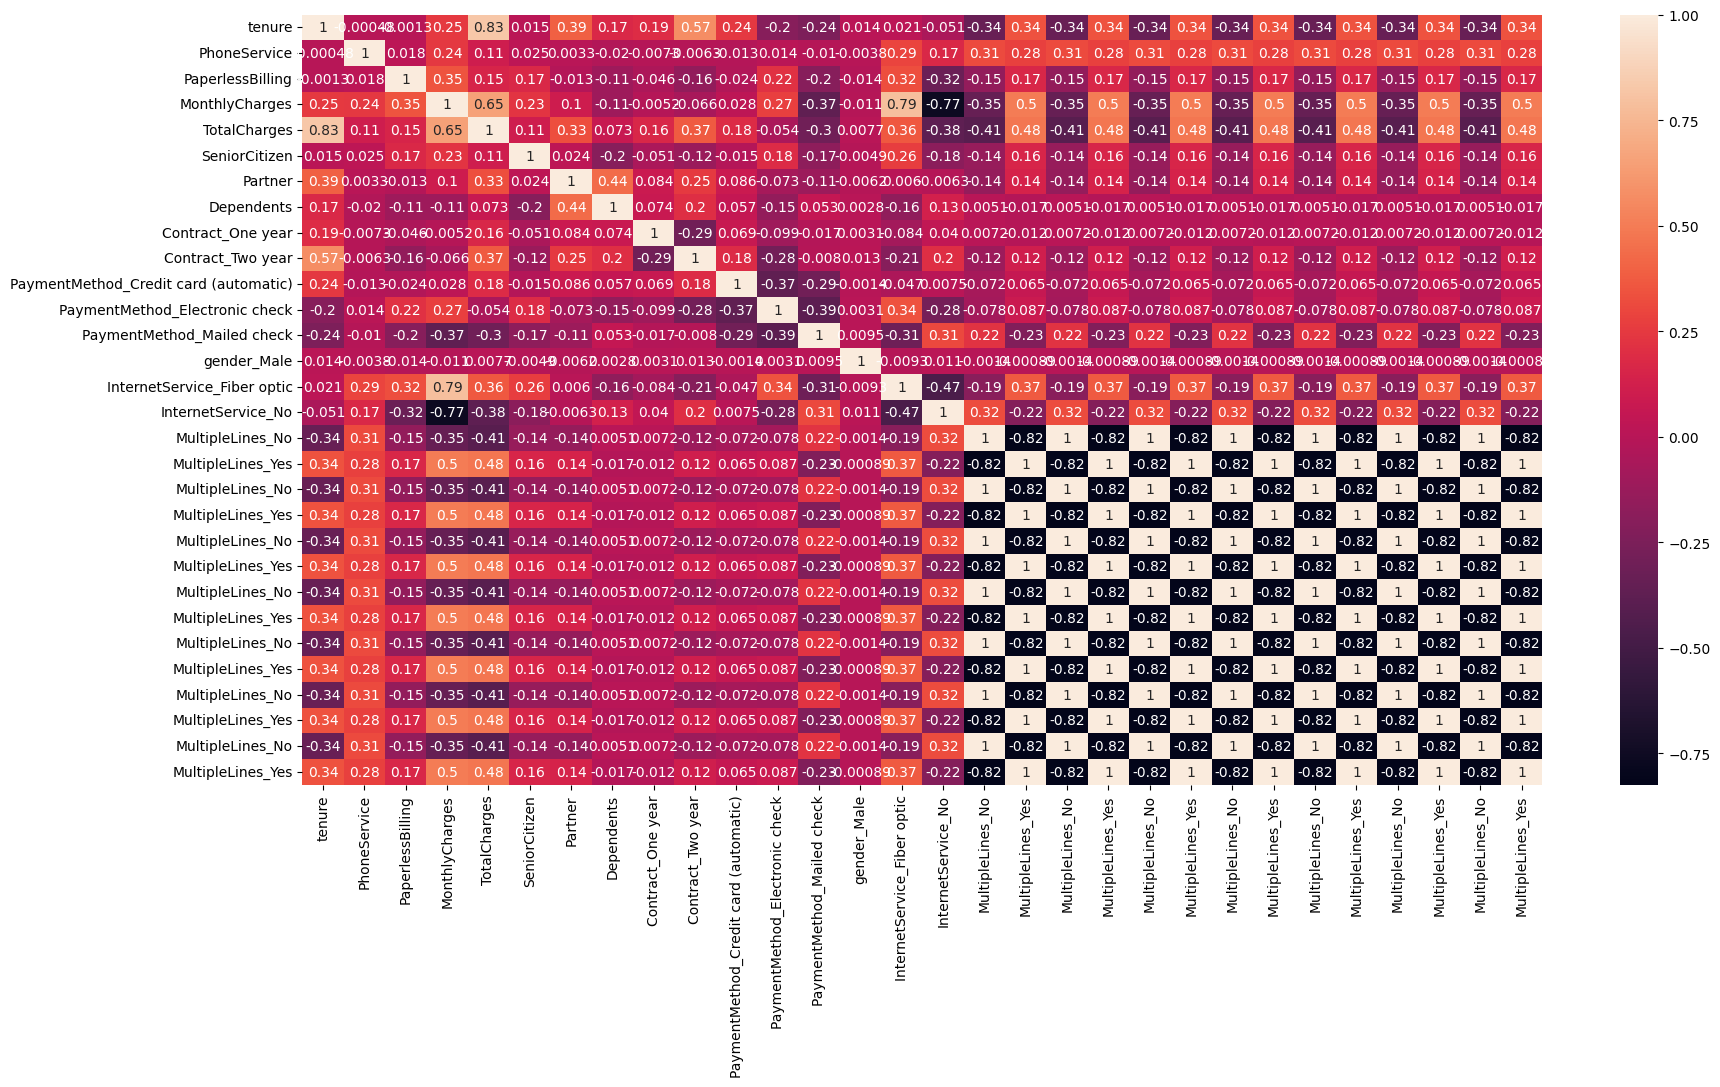

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [47]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

KeyError: "['MultipleLines_No' 'OnlineSecurity_No' 'OnlineBackup_No'\n 'DeviceProtection_No' 'TechSupport_No' 'StreamingTV_No'\n 'StreamingMovies_No'] not found in axis"

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

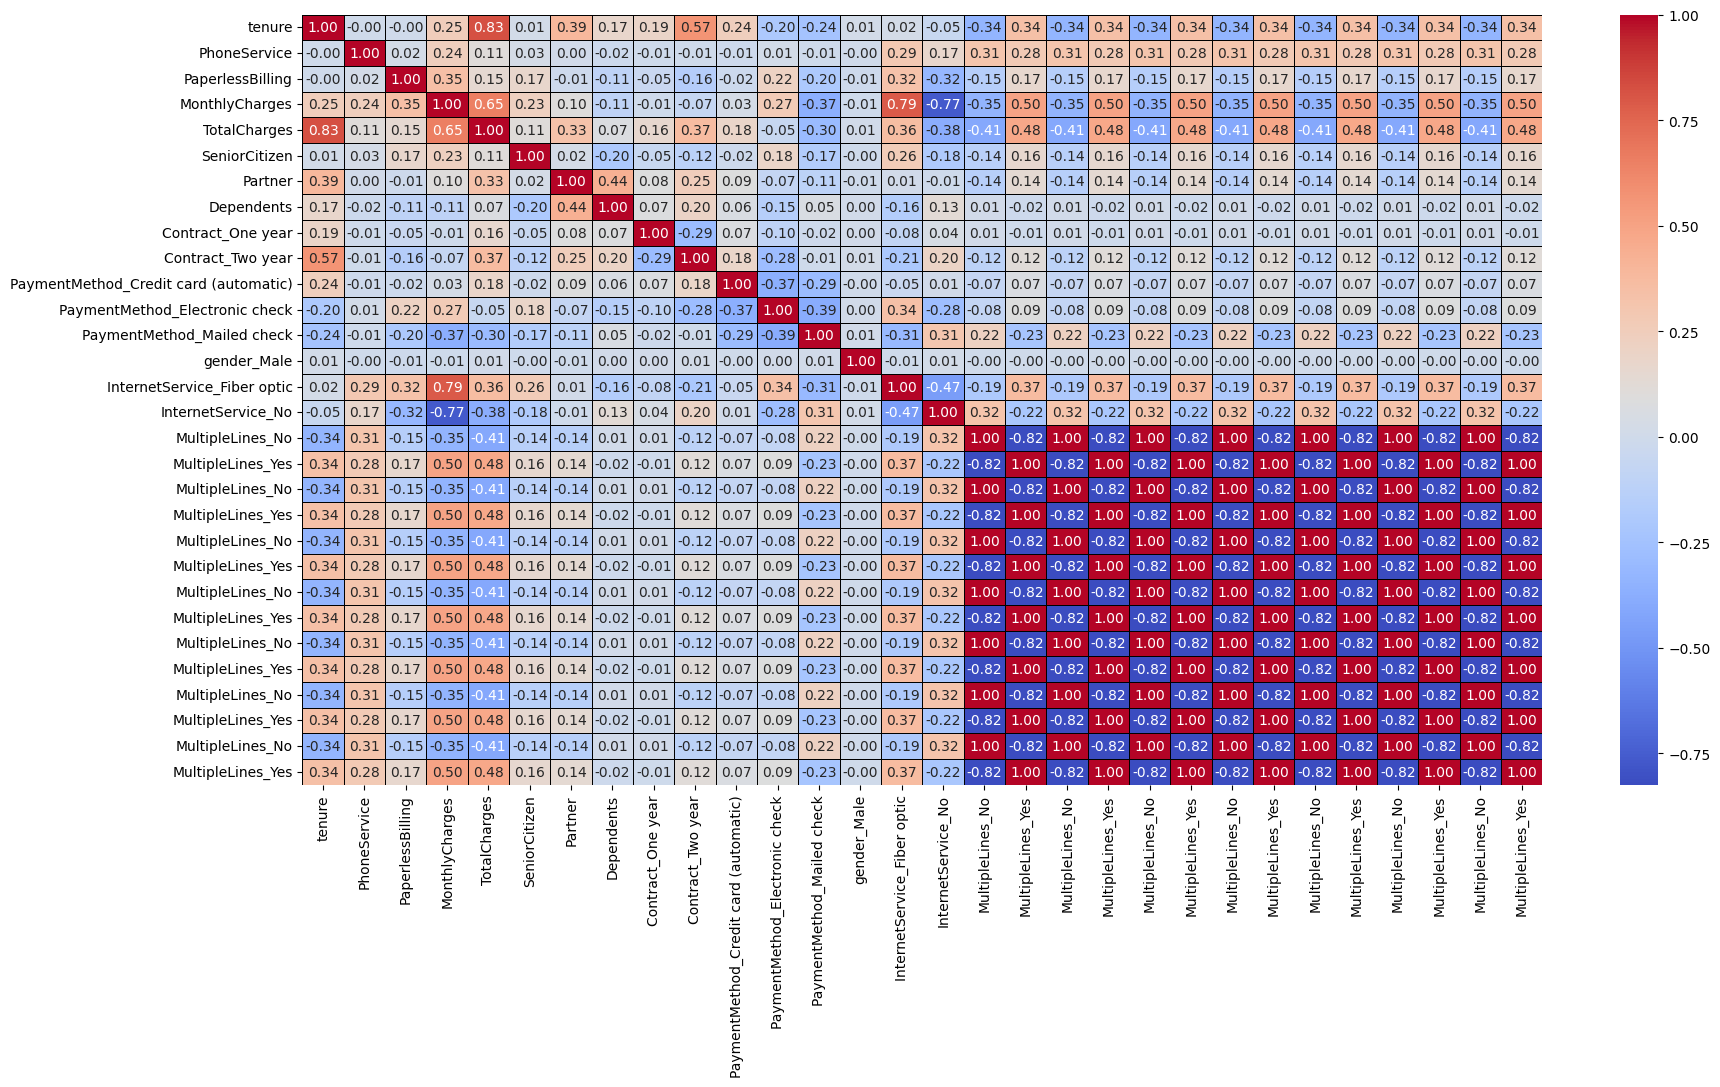

In [56]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [57]:
import statsmodels.api as sm

In [59]:
# Convert boolean columns to int for statsmodels compatibility
X_train_sm = X_train.copy()
for col in X_train_sm.select_dtypes(include='bool').columns:
	X_train_sm[col] = X_train_sm[col].astype(int)

# Logistic regression model
logm1 = sm.GLM(y_train, sm.add_constant(X_train_sm), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4904
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.5
Date:                Sat, 28 Jun 2025   Deviance:                       4059.1
Time:                        20:42:01   Pearson chi2:                 6.24e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2771
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3089      0.216     -6.071      0.000      -1.731      -0.886
tenure                                   -1.5532      0.189     -8.227      0.000      -1.923      -1.183
PhoneService                             -0.1000      0.040     -2.482      0.013      -0.179      -0.021
PaperlessBilling                          0.3614      0.089      4.060      0.000       0.187       0.536
MonthlyCharges                           -0.0286      0.150     -0.191      0.849      -0.322       0.265
TotalCharges                              0.7026      0.197      3.560      0.000       0.316       1.089
SeniorCitizen                             0.4309      0.101      4.286      0.000       0.234       0.628
Partner                                   0.0579      0.093      0.624      0.532      -0.124       0.240
Dependents                               -0.1733      0.106     -1.629      0.103      -0.382       0.035
Contract_One year                        -0.7032      0.128     -5.512      0.000      -0.953      -0.453
Contract_Two year                        -1.3893      0.210     -6.604      0.000      -1.802      -0.977
PaymentMethod_Credit card (automatic)    -0.2577      0.136     -1.897      0.058      -0.524       0.009
PaymentMethod_Electronic check            0.2245      0.111      2.016      0.044       0.006       0.443
PaymentMethod_Mailed check               -0.2680      0.136     -1.969      0.049      -0.535      -0.001
gender_Male                              -0.0206      0.078     -0.266      0.791      -0.173       0.132
InternetService_Fiber optic               0.8922      0.161      5.544      0.000       0.577       1.208
InternetService_No                       -0.7507      0.229     -3.279      0.001      -1.199      -0.302
MultipleLines_No                         -0.0667      0.020     -3.391      0.001      -0.105      -0.028
MultipleLines_Yes                        -0.0333      0.023     -1.457      0.145      -0.078       0.011
MultipleLines_No                         -0.0667      0.020     -3.391      0.001      -0.105      -0.028
MultipleLines_Yes                        -0.0333      0.023     -1.457      0.145      -0.078       0.011
MultipleLines_No                         -0.0667      0.020     -3.391      0.001      -0.105      -0.028
MultipleLines_Yes                        -0.0333      0.023     -1.457      0.145      -0.078       0.011
MultipleLines_No                         -0.0667      0.020     -3.391      0.001      -0.105      -0.028
MultipleLines_Yes                        -0.0333      0.023     -1.457      0.145      -0.078       0.011
MultipleLines_No                         -0.0667      0.020     -3.391      0.001      -0.105      -0.028
MultipleL

### Step 8: Feature Selection Using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)  # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [63]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False])

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 15),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 10),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 16),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No', False, 2),
 ('MultipleLines_Yes', False, 3),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 11),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 13),
 ('MultipleLines_No', False, 4),
 ('MultipleLines_Yes', False, 5),
 ('MultipleLines_No', False, 6),
 ('MultipleLines_Yes', False, 12),
 ('MultipleLines_No', False, 7),
 ('MultipleLines_Yes', False, 8),
 ('MultipleLines_No', False, 9),
 ('MultipleLines_Yes', False,

In [65]:
col = X_train.columns[rfe.support_]

In [66]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'MultipleLines_Yes', 'MultipleLines_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'MultipleLines_No', 'MultipleLines_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [68]:
X_train_sm = X_train[col].copy()
for c in X_train_sm.select_dtypes(include='bool').columns:
	X_train_sm[c] = X_train_sm[c].astype(int)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.8
Date:                Sat, 28 Jun 2025   Deviance:                       4059.6
Time:                        20:43:36   Pearson chi2:                 6.20e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2771
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2757      0.177     -7.200      0.000      -1.623      -0.928
tenure                                   -1.5328      0.178     -8.614      0.000      -1.882      -1.184
PhoneService                             -0.3543      0.171     -2.069      0.039      -0.690      -0.019
PaperlessBilling                          0.3604      0.089      4.057      0.000       0.186       0.534
TotalCharges                              0.6861      0.175      3.912      0.000       0.342       1.030
SeniorCitizen                             0.4378      0.100      4.379      0.000       0.242       0.634
Dependents                               -0.1475      0.098     -1.509      0.131      -0.339       0.044
Contract_One year                        -0.7067      0.126     -5.598      0.000      -0.954      -0.459
Contract_Two year                        -1.3944      0.209     -6.663      0.000      -1.805      -0.984
PaymentMethod_Credit card (automatic)    -0.2602      0.136     -1.918      0.055      -0.526       0.006
PaymentMethod_Electronic check            0.2232      0.111      2.006      0.045       0.005       0.441
PaymentMethod_Mailed check               -0.2712      0.135     -2.002      0.045      -0.537      -0.006
InternetService_Fiber optic               0.8730      0.114      7.633      0.000       0.649       1.097
InternetService_No                       -0.7185      0.160     -4.489      0.000      -1.032      -0.405
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleLines_No                         -0.0164      0.007     -2.415      0.016      -0.030      -0.003
MultipleL

In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.183995
5790    0.200207
6498    0.710958
880     0.651986
2784    0.607478
3874    0.407197
5387    0.518444
6623    0.827157
4465    0.177049
5364    0.510256
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18399479, 0.20020697, 0.71095823, 0.65198558, 0.6074783 ,
       0.40719707, 0.51844434, 0.8271565 , 0.17704854, 0.51025623])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [71]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.183995,879
1,0,0.200207,5790
2,1,0.710958,6498
3,1,0.651986,880
4,1,0.607478,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.183995,879,0
1,0,0.200207,5790,0
2,1,0.710958,6498,1
3,1,0.651986,880,1
4,1,0.607478,2784,1


In [73]:
from sklearn import metrics

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3275  360]
 [ 589  698]]


In [75]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8071921982933766


#### Checking VIFs

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Convert boolean columns to int for VIF calculation
X_vif = X_train[col].copy()
for c in X_vif.select_dtypes(include='bool').columns:
	X_vif[c] = X_vif[c].astype(int)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,MultipleLines_No,inf
14,MultipleLines_No,inf
25,MultipleLines_No,inf
24,MultipleLines_No,inf
23,MultipleLines_No,inf
22,MultipleLines_No,inf
21,MultipleLines_No,inf
20,MultipleLines_No,inf
19,MultipleLines_No,inf
18,MultipleLines_No,inf


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [80]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_No'],
      dtype='object')

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = X_train[col].copy()
for c in X_train_sm.select_dtypes(include='bool').columns:
	X_train_sm[c] = X_train_sm[c].astype(int)
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.9
Date:                Sat, 28 Jun 2025   Deviance:                       4063.8
Time:                        20:45:22   Pearson chi2:                 5.99e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2764
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4984      0.142    -10.548      0.000      -1.777      -1.220
tenure                                   -1.4596      0.174     -8.369      0.000      -1.801      -1.118
PaperlessBilling                          0.3580      0.089      4.035      0.000       0.184       0.532
TotalCharges                              0.5948      0.170      3.500      0.000       0.262       0.928
SeniorCitizen                             0.4411      0.100      4.407      0.000       0.245       0.637
Dependents                               -0.1488      0.098     -1.522      0.128      -0.340       0.043
Contract_One year                        -0.6975      0.126     -5.528      0.000      -0.945      -0.450
Contract_Two year                        -1.3756      0.209     -6.579      0.000      -1.785      -0.966
PaymentMethod_Credit card (automatic)    -0.2554      0.136     -1.881      0.060      -0.521       0.011
PaymentMethod_Electronic check            0.2330      0.111      2.095      0.036       0.015       0.451
PaymentMethod_Mailed check               -0.2599      0.135     -1.923      0.055      -0.525       0.005
InternetService_Fiber optic               0.7935      0.107      7.422      0.000       0.584       1.003
InternetService_No                       -0.8046      0.154     -5.227      0.000      -1.106      -0.503
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleLines_No                         -0.0221      0.006     -3.570      0.000      -0.034      -0.010
MultipleL

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.20856863, 0.17236754, 0.70568733, 0.6434639 , 0.59781759,
       0.42292784, 0.46588207, 0.83529544, 0.15237531, 0.52007387])

In [85]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.208569,879,0
1,0,0.172368,5790,0
2,1,0.705687,6498,1
3,1,0.643464,880,1
4,1,0.597818,2784,1


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8071921982933766


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [89]:
# Convert boolean columns to int for VIF calculation
X_vif = X_train[col].copy()
for c in X_vif.select_dtypes(include='bool').columns:
	X_vif[c] = X_vif[c].astype(int)

vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,MultipleLines_No,inf
14,MultipleLines_No,inf
24,MultipleLines_No,inf
23,MultipleLines_No,inf
22,MultipleLines_No,inf
21,MultipleLines_No,inf
20,MultipleLines_No,inf
19,MultipleLines_No,inf
18,MultipleLines_No,inf
17,MultipleLines_No,inf


In [90]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_No'],
      dtype='object')

In [92]:
# Let's re-run the model using the selected variables
X_train_sm = X_train[col].copy()
for c in X_train_sm.select_dtypes(include='bool').columns:
	X_train_sm[c] = X_train_sm[c].astype(int)
X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.4
Date:                Sat, 28 Jun 2025   Deviance:                       4076.7
Time:                        20:46:51   Pearson chi2:                 5.13e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2745
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4996      0.141    -10.657      0.000      -1.775      -1.224
tenure                                   -0.9021      0.064    -14.146      0.000      -1.027      -0.777
PaperlessBilling                          0.3584      0.089      4.048      0.000       0.185       0.532
SeniorCitizen                             0.4429      0.100      4.411      0.000       0.246       0.640
Dependents                               -0.1606      0.097     -1.647      0.099      -0.352       0.030
Contract_One year                        -0.6684      0.125     -5.350      0.000      -0.913      -0.423
Contract_Two year                        -1.2957      0.205     -6.314      0.000      -1.698      -0.893
PaymentMethod_Credit card (automatic)    -0.2571      0.136     -1.897      0.058      -0.523       0.009
PaymentMethod_Electronic check            0.2408      0.111      2.166      0.030       0.023       0.459
PaymentMethod_Mailed check               -0.2225      0.134     -1.659      0.097      -0.485       0.040
InternetService_Fiber optic               0.9826      0.092     10.641      0.000       0.802       1.164
InternetService_No                       -0.8648      0.151     -5.714      0.000      -1.161      -0.568
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
MultipleLines_No                         -0.0233      0.006     -3.778      0.000      -0.035      -0.011
=========

In [93]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [94]:
y_train_pred[:10]

array([0.238862  , 0.20809965, 0.71441721, 0.64235267, 0.59992679,
       0.41090742, 0.44796763, 0.84362309, 0.18051101, 0.52968419])

In [95]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [96]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.238862,879,0
1,0,0.208100,5790,0
2,1,0.714417,6498,1
3,1,0.642353,880,1
4,1,0.599927,2784,1


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8043478260869565


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [99]:
# Convert boolean columns to int for VIF calculation
X_vif = X_train[col].copy()
for c in X_vif.select_dtypes(include='bool').columns:
	X_vif[c] = X_vif[c].astype(int)

vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,MultipleLines_No,inf
13,MultipleLines_No,inf
23,MultipleLines_No,inf
22,MultipleLines_No,inf
21,MultipleLines_No,inf
20,MultipleLines_No,inf
19,MultipleLines_No,inf
18,MultipleLines_No,inf
17,MultipleLines_No,inf
16,MultipleLines_No,inf


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [100]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3284,  351],
       [ 612,  675]], dtype=int64)

In [101]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8043478260869565

## Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5244755244755245

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.9034387895460798

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09656121045392022


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.6578947368421053


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8429158110882957


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

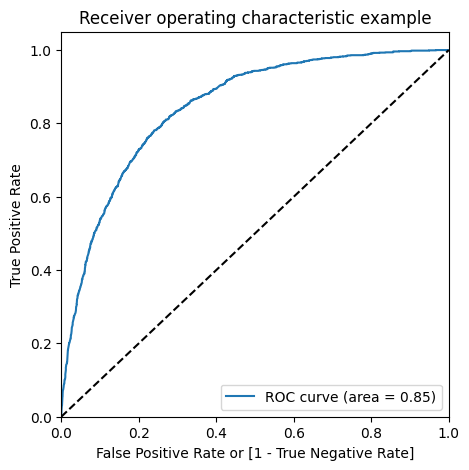

In [111]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.238862,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.208100,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.714417,6498,1,1,1,1,1,1,1,1,1,0,0
3,1,0.642353,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.599927,2784,1,1,1,1,1,1,1,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.609915  0.943279  0.491884
0.2   0.2  0.718407  0.854701  0.670151
0.3   0.3  0.768590  0.766123  0.769464
0.4   0.4  0.795612  0.647242  0.848143
0.5   0.5  0.804348  0.524476  0.903439
0.6   0.6  0.796018  0.374514  0.945254
0.7   0.7  0.775701  0.200466  0.979367
0.8   0.8  0.746648  0.037296  0.997799
0.9   0.9  0.738521  0.000000  1.000000


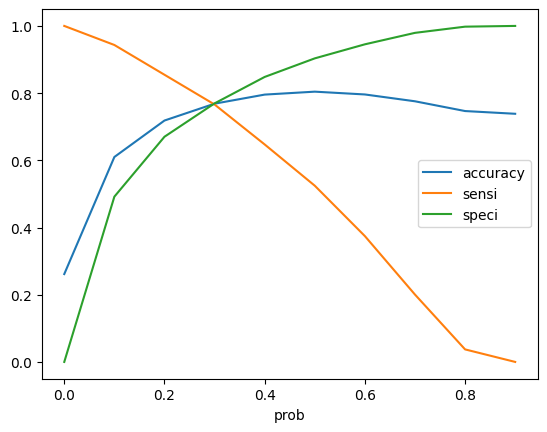

In [115]:
# Let's plot accuracy, sensitivity, and specificity for various probabilities.
ax = cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.238862,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.208100,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.714417,6498,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.642353,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.599927,2784,1,1,1,1,1,1,1,0,0,0,0,1


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7685900040633888

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2797,  838],
       [ 301,  986]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7661227661227661

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.7694635488308116

In [122]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23053645116918844


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5405701754385965


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9028405422853454


## Precision and Recall

In [125]:
#Looking at the confusion matrix again

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3284,  351],
       [ 612,  675]], dtype=int64)

##### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6578947368421053

##### Recall
TP / TP + FN

In [128]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5244755244755245

Using sklearn utilities for the same

In [129]:
from sklearn.metrics import precision_score, recall_score

precision_score

In [131]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6578947368421053

In [132]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5244755244755245

### Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

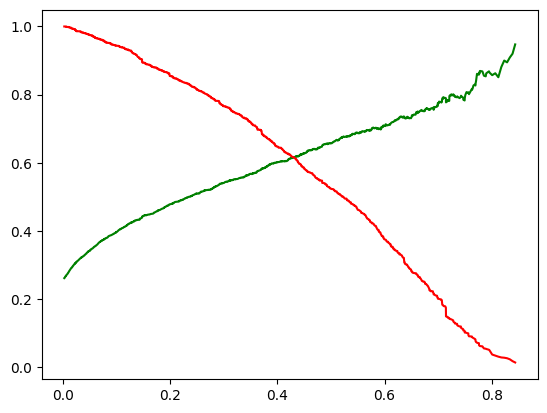

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [137]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [138]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,...,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No,MultipleLines_No
942,-0.347623,1,0,0,False,False,True,False,False,True,...,True,True,True,True,True,True,True,True,True,True
3730,0.999203,1,0,0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1761,1.040015,1,0,0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2283,-1.286319,1,0,0,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1872,0.346196,0,0,1,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [139]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [141]:
# Convert boolean columns to int for compatibility with statsmodels
X_test_sm_fixed = X_test_sm.copy()
for col in X_test_sm_fixed.select_dtypes(include='bool').columns:
	X_test_sm_fixed[col] = X_test_sm_fixed[col].astype(int)

y_test_pred = res.predict(X_test_sm_fixed)

In [142]:
y_test_pred[:10]

942     0.394683
3730    0.211326
1761    0.011021
2283    0.611516
1872    0.011447
1970    0.667309
2532    0.264638
1616    0.008456
2485    0.682216
5914    0.187213
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
# Let's see the head
y_pred_1.head()

,0
942,0.394683
3730,0.211326
1761,0.011021
2283,0.611516
1872,0.011447


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.394683
1,1,3730,0.211326
2,0,1761,0.011021
3,1,2283,0.611516
4,0,1872,0.011447


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_Prob'])

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.394683
1,3730,1,0.211326
2,1761,0,0.011021
3,2283,1,0.611516
4,1872,0,0.011447


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [155]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.394683,0
1,3730,1,0.211326,0
2,1761,0,0.011021,0
3,2283,1,0.611516,1
4,1872,0,0.011447,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7900473933649289

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1302,  226],
       [ 217,  365]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.627147766323024

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8520942408376964